In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df=df[['LotFrontage','LotArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'SalePrice']]

In [16]:
df = df.dropna()

### PLotting

<Axes: >

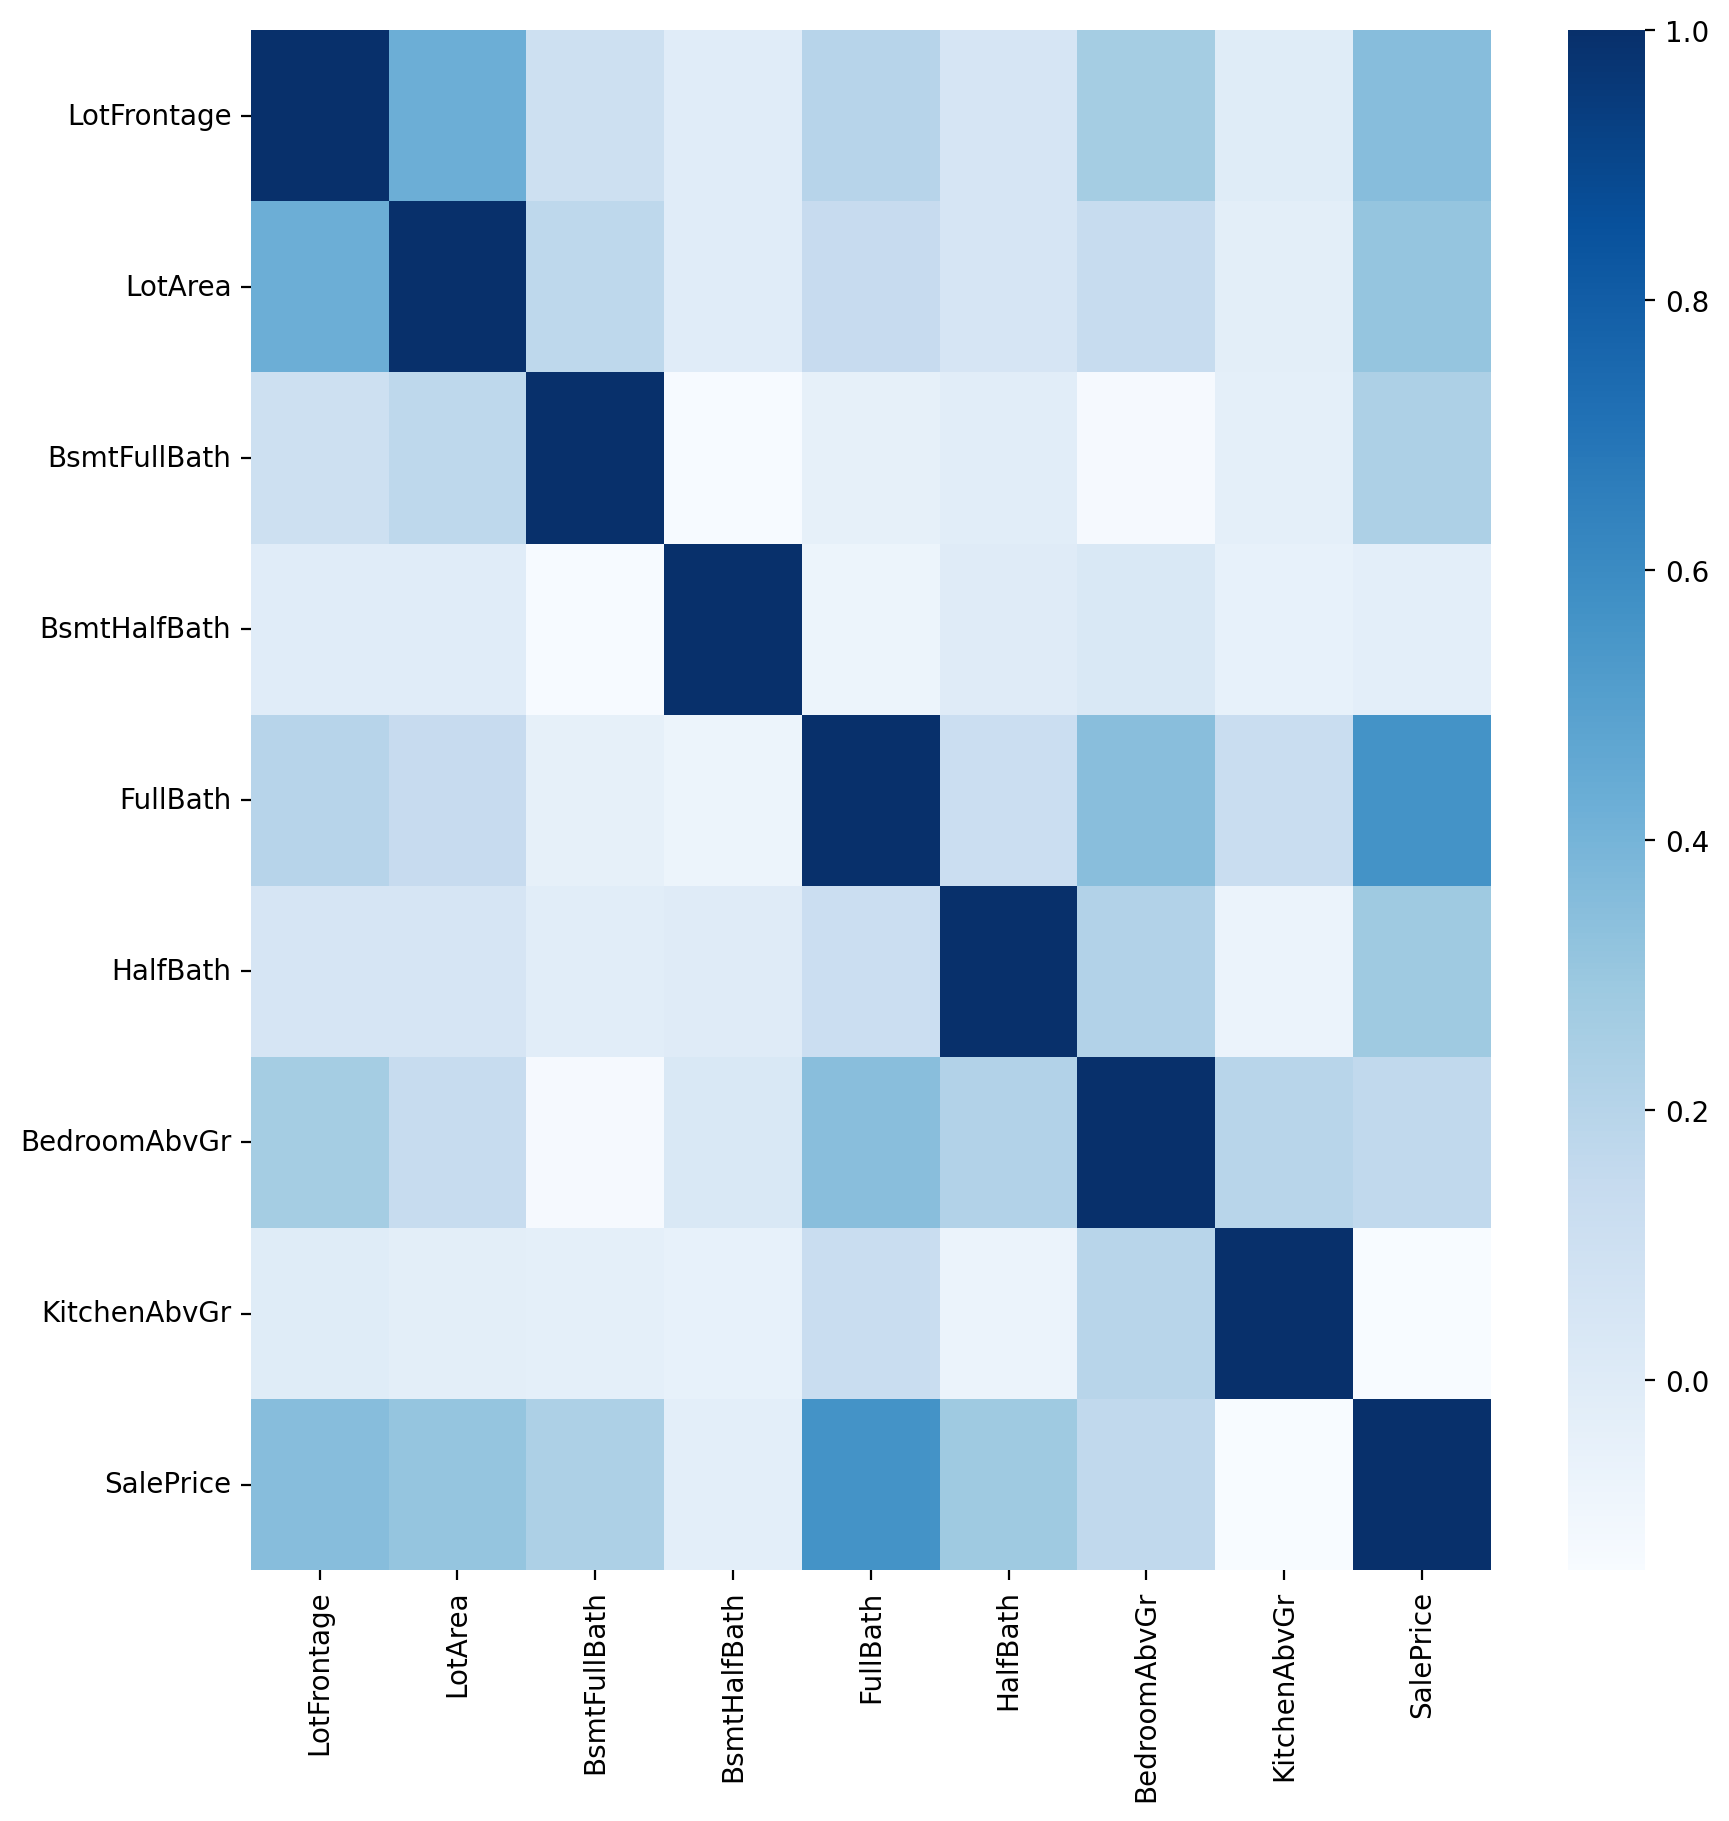

In [17]:
# correlation matrix 
corr = df.corr(numeric_only=True)

# figure settings
plt.figure(figsize=(10,10), dpi=200)

# corr matrix "heatmap"
sns.heatmap(corr, cmap="Blues")

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score, KFold, train_test_split

In [19]:
# Split data into features and target 
X = df.iloc[:, :-1].values
y = df.iloc[:, -1:].values

In [20]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


In [21]:
# StandardScaler
scaler = StandardScaler(copy=True, with_std=True)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [22]:
# Cross-validated scores
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(LinearRegression(), X_train, y_train, cv=cv)
print("Cross-validated scores:", scores)
print(f"Mean Cross-validated-accuracy: {scores.mean()}")

Cross-validated scores: [0.51012703 0.44781238 0.39804641 0.64478355 0.43529406]
Mean Cross-validated-accuracy: 0.4872126852249865


In [23]:
# Create and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [24]:
# Predictions
y_pred = model.predict(X_test)


In [25]:
# Train and Test Scores
print(f"Train score: {model.score(X_train, y_train)}")
print(f"Test score: {model.score(X_test, y_test)}")


Train score: 0.5375917302479464
Test score: 0.4541289529694901


In [26]:
# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"\nMean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")



Mean Absolute Error: 36809.51488297271
Mean Squared Error: 2611422392.659437
Root Mean Squared Error: 51102.07816380305


In [27]:
# Final Accuracy (R^2)
r2 = r2_score(y_test, y_pred)
print(f"Coefficient of Determination (R^2): {r2}")


Coefficient of Determination (R^2): 0.4541289529694901


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
# KNN Regressor
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], "p": [1, 2]}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2]})

In [29]:
best_params = grid_search.best_params_
print(best_params)


{'n_neighbors': 7, 'p': 1}


In [30]:
# Create and train the KNN regression model
knn_model = grid_search.best_estimator_
knn_model.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=7, p=1)

In [31]:
# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)


In [32]:
# Cross-Validation
scores_knn = cross_val_score(knn_model, X_train, y_train, cv=5)
average_score_knn = scores_knn.mean()
print(f"Cross-Validation score (KNN): {average_score_knn}")


Cross-Validation score (KNN): 0.5827531022319219
